In [2]:
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
#from multi_molecule import Multi_Molecule
from autotst.molecule import *
import ase
import os
from ase import io
from ase.visualize import view
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from ase.io.gaussian_reader import GaussianReader
from ase.io.gaussian import read_gaussian_out
from ase.calculators.gaussian import Gaussian
from ase import Atoms

import numpy as np
import matplotlib

In [19]:
results = [os.path.join("/gss_gpfs_scratch/harms.n/drug_conformer/log_files/",r) for r in os.listdir("/gss_gpfs_scratch/harms.n/drug_conformer/log_files/") if r.endswith(".log")]
#results = [os.path.join("/gss_gpfs_scratch/harms.n/drug_conformer/",r) for r in os.listdir("/gss_gpfs_scratch/harms.n/drug_conformer/") if (not (r.startswith("aa") or r.startswith("gly") or r.startswith("ga") or r.startswith("opt"))) and r.endswith(".log") and (not "master" in r)]
master = [os.path.join("/gss_gpfs_scratch/harms.n/drug_conformer/master_results/",r) for r in os.listdir("/gss_gpfs_scratch/harms.n/drug_conformer/master_results/") if r.endswith(".log")]

master

['/gss_gpfs_scratch/harms.n/drug_conformer/master_results/Phe_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/master_results/Trp_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/master_results/Ile_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/master_results/Gly_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/master_results/Ala_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/master_results/Val_master.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/master_results/Leu_master.log']

In [5]:
results

['/gss_gpfs_scratch/harms.n/drug_conformer/es_Gly_97.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Ile_2.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Val_45.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/es_Val_51.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Gly_12.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Val_23.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/es_Gly_79.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Leu_35.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Leu_7.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/es_Trp_63.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Leu_33.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Ala_28.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Ile_42.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/es_Trp_74.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/es_Ile_95.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Gly_0.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_Gly_18.log',


In [8]:
smiles_dict = {
    "Phe" : "NC(CC1=CC=CC=C1)C(=O)O",
    "Gly" : "NCCC(=O)O",
    "Ala" : "NC(C)C(=O)O",
    "Ile" : "NC(C(C)CC)C(=O)O",
    "Leu" : "NC(CC(C)C)C(=O)O",
    "Val" : "NC(C(C)C)C(=O)O",
    "Trp" : "NC(CC1=CNC2=C1(C=CC=C2))C(=O)O"
}

In [27]:
m.split("/")[-1].split("_")[0]

r.split("/")[-1].split("_")[-1].split(".")[0]

'39'

In [28]:


potential_results = []
for m in master:
    for r in results:
        if m.split('/')[-1].split("_")[0] == r.split('/')[-1].split("_")[1]:
            try:
                name = m.split('/')[-1].split("_")[0]
                
                num = int(r.split("/")[-1].split("_")[-1].split(".")[0])

                print name
                #mol = Multi_Molecule(smiles)
                if r.split('/')[-1].split("_")[0].startswith("es"):
                    t = "es"
                else:
                    t = "ga"
                

                am = read_gaussian_out(m, quantity="energy")
                ar = read_gaussian_out(r, quantity="energy")
                mass = read_gaussian_out(m).get_masses().sum()
                
                if ar == 0.:
                    print "We have a zero energy.... setting ar to nan"
                    potential_results.append([name, num, np.nan, am, mass, t, np.nan])
                else:
                
                    print "The difference between the master PE and our PE is {}".format(am - ar)

                    print

                    potential_results.append([name, num, ar , am , mass, t, np.abs(np.abs(am-ar)/am)])
            except IndexError:
                print "There was an error, this job probabaly failed"
                name = m.split('/')[-1].split("_")[0]
                mass = read_gaussian_out(m).get_masses().sum()
                if len(r.split("/")[-1].split("_")) == 2:
                    num = r.split("/")[-1].split("_")[-1].split(".")[0]
                else:
                    num = r.split("/")[-1].split("_")[1]
                if r.split('/')[-1].split("_")[-1].startswith("es"):
                    t = "ga"
                else:
                    t = "es"
                potential_results.append([name, num, np.nan, am, mass, t, np.nan])
                print
            
        
potential_results

Phe
The difference between the master PE and our PE is -0.21828973869

Phe
The difference between the master PE and our PE is -0.246573253324

Phe
The difference between the master PE and our PE is -0.246497061442

Phe
The difference between the master PE and our PE is -0.147431289482

Phe
The difference between the master PE and our PE is -0.219560510417

Phe
The difference between the master PE and our PE is -0.211739958073

Phe
The difference between the master PE and our PE is -0.178403289055

Phe
The difference between the master PE and our PE is -0.162626127438

Phe
The difference between the master PE and our PE is -0.157752568201

Phe
The difference between the master PE and our PE is -0.246616791543

Phe
The difference between the master PE and our PE is -0.246478013471

Phe
The difference between the master PE and our PE is -0.246513388272

Phe
The difference between the master PE and our PE is -0.246605906985

Phe
The difference between the master PE and our PE is -0.1651731

The difference between the master PE and our PE is -0.338700121843

Trp
The difference between the master PE and our PE is -0.392083418948

Trp
The difference between the master PE and our PE is -0.338700121843

Trp
The difference between the master PE and our PE is -0.338700121843

Trp
The difference between the master PE and our PE is -0.338700121843

Trp
The difference between the master PE and our PE is -0.400203296536

Trp
The difference between the master PE and our PE is -0.411136831441

Trp
There was an error, this job probabaly failed

Trp
The difference between the master PE and our PE is -0.338700121843

Trp
The difference between the master PE and our PE is -0.338700121843

Trp
The difference between the master PE and our PE is -0.338700121843

Trp
The difference between the master PE and our PE is -0.39686990175

Trp
The difference between the master PE and our PE is -0.338700121843

Trp
There was an error, this job probabaly failed

Trp
The difference between the master P

The difference between the master PE and our PE is -0.0795987463971

Ile
The difference between the master PE and our PE is -0.112845617843

Ile
The difference between the master PE and our PE is -0.0800803879301

Ile
The difference between the master PE and our PE is -0.0461858854978

Ile
The difference between the master PE and our PE is -0.1310718042

Ile
The difference between the master PE and our PE is -0.394943335619

Ile
The difference between the master PE and our PE is -0.0795688138733

Ile
There was an error, this job probabaly failed

Ile
The difference between the master PE and our PE is -0.046634873368

Ile
The difference between the master PE and our PE is -0.102439983826

Ile
The difference between the master PE and our PE is -0.0796014675361

Ile
The difference between the master PE and our PE is -0.0344224033197

Ile
The difference between the master PE and our PE is -0.0461858854978

Ile
The difference between the master PE and our PE is -1.44277217726

Ile
The diffe

The difference between the master PE and our PE is 0.0010041001442

Gly
The difference between the master PE and our PE is 0.0010041001442

Gly
The difference between the master PE and our PE is 0.0010041001442

Gly
The difference between the master PE and our PE is -0.452960731763

Gly
The difference between the master PE and our PE is 0.0010041001442

Gly
The difference between the master PE and our PE is -0.224608222523

Gly
The difference between the master PE and our PE is -0.449845028063

Ala
The difference between the master PE and our PE is -0.298495298994

Ala
The difference between the master PE and our PE is -0.298495298994

Ala
The difference between the master PE and our PE is -0.271104317822

Ala
The difference between the master PE and our PE is -0.274304376817

Ala
There was an error, this job probabaly failed

Ala
The difference between the master PE and our PE is -0.298495298994

Ala
The difference between the master PE and our PE is -0.233794786443

Ala
The differenc

The difference between the master PE and our PE is -0.219481597396

Val
The difference between the master PE and our PE is -0.219481597396

Val
The difference between the master PE and our PE is -0.219481597396

Val
The difference between the master PE and our PE is -0.219481597396

Val
The difference between the master PE and our PE is -0.219481597396

Val
The difference between the master PE and our PE is -0.219481597396

Val
The difference between the master PE and our PE is -0.0114369455459

Val
The difference between the master PE and our PE is -0.0789647211041

Val
The difference between the master PE and our PE is -0.0102314811447

Val
The difference between the master PE and our PE is -0.0110070056471

Val
The difference between the master PE and our PE is -0.219481597396

Val
There was an error, this job probabaly failed

Val
The difference between the master PE and our PE is -0.219481597396

Val
The difference between the master PE and our PE is -0.0796341212008

Val
The diff

There was an error, this job probabaly failed

Leu
There was an error, this job probabaly failed

Leu
The difference between the master PE and our PE is -0.359190295521

Leu
The difference between the master PE and our PE is -0.144193134543

Leu
The difference between the master PE and our PE is -0.132663670285

Leu
The difference between the master PE and our PE is -0.111914988443

Leu
The difference between the master PE and our PE is -0.0668502120461

Leu
The difference between the master PE and our PE is -0.00617154235078

Leu
The difference between the master PE and our PE is -0.275000988302

Leu
The difference between the master PE and our PE is -0.0892179713592

Leu
The difference between the master PE and our PE is -0.111914988443

Leu
The difference between the master PE and our PE is -0.0206588842702

Leu
The difference between the master PE and our PE is -0.0784803584338

Leu
The difference between the master PE and our PE is -0.285637919098

Leu
The difference between the m

[['Phe',
  88,
  -15095.65708532575,
  -15095.875375064441,
  165.19200000000004,
  'es',
  1.4460223953009023e-05],
 ['Phe',
  24,
  -15095.628801811117,
  -15095.875375064441,
  165.19200000000004,
  'ga',
  1.6333816171470541e-05],
 ['Phe',
  38,
  -15095.628878002999,
  -15095.875375064441,
  165.19200000000004,
  'ga',
  1.6328768972820309e-05],
 ['Phe',
  66,
  -15095.727943774958,
  -15095.875375064441,
  165.19200000000004,
  'es',
  9.7663292667354872e-06],
 ['Phe',
  61,
  -15095.655814554024,
  -15095.875375064441,
  165.19200000000004,
  'es',
  1.454440401513522e-05],
 ['Phe',
  99,
  -15095.663635106368,
  -15095.875375064441,
  165.19200000000004,
  'es',
  1.4026345131511521e-05],
 ['Phe',
  50,
  -15095.696971775385,
  -15095.875375064441,
  165.19200000000004,
  'es',
  1.1818015492508915e-05],
 ['Phe',
  92,
  -15095.712748937003,
  -15095.875375064441,
  165.19200000000004,
  'es',
  1.0772884870683887e-05],
 ['Phe',
  95,
  -15095.71762249624,
  -15095.875375064441

In [29]:
potential_results = pd.DataFrame(potential_results)
potential_results.columns = ["AA" ,"num", "e_r", "e_m", "MM", "type", "delta_e"]
potential_results.set_index("AA")

,num,e_r,e_m,MM,type,delta_e
AA,,,,,,
Phe,88,-15095.657085,-15095.875375,165.192,es,1.446022e-05
Phe,24,-15095.628802,-15095.875375,165.192,ga,1.633382e-05
Phe,38,-15095.628878,-15095.875375,165.192,ga,1.632877e-05
Phe,66,-15095.727944,-15095.875375,165.192,es,9.766329e-06
Phe,61,-15095.655815,-15095.875375,165.192,es,1.454440e-05
Phe,99,-15095.663635,-15095.875375,165.192,es,1.402635e-05
Phe,50,-15095.696972,-15095.875375,165.192,es,1.181802e-05
Phe,92,-15095.712749,-15095.875375,165.192,es,1.077288e-05
Phe,95,-15095.717622,-15095.875375,165.192,es,1.045004e-05


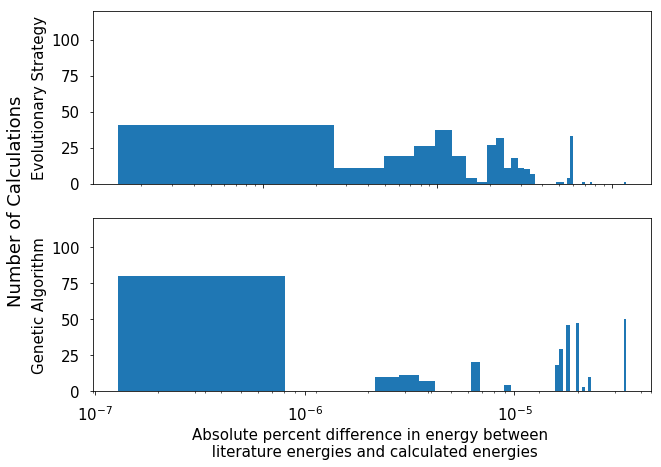

In [47]:

fig = plt.figure(figsize=(10, 7))

ax = fig.add_subplot(111)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

potential_results[potential_results.type == "es"].plot(kind="Hist", x="AA", y="delta_e", ax=ax1, bins=50, sharex=True, legend=False)
potential_results[potential_results.type == "ga"].plot(kind="Hist", x="AA", y="delta_e", ax=ax2, bins=50, sharex=True, legend=False)

ax1.set_ylim([0, 120])
ax2.set_ylim([0, 120])

ax1.set_ylabel("Evolutionary Strategy", fontdict={"size":15})
ax2.set_ylabel("Genetic Algorithm", fontdict={"size":15})

ax1.tick_params(labelsize=15, pad =10)
ax2.tick_params(labelsize=15, pad = 10)

ax.set_ylabel("Number of Calculations",labelpad=45, fontdict={"size":18})
ax2.set_xlabel("Absolute percent difference in energy between \n literature energies and calculated energies", fontdict={"size":15} )

fig.savefig("hist.pdf")



In [31]:
temp = ["ga", "es"]
stats = []
for t in temp:
    print "For {}".format(t)
    print
    for name in smiles_dict.iterkeys():
        print "{0} % of the geometries we successfully calculated for {1}.".format((potential_results[(potential_results.AA == name) & (potential_results.type == t)].delta_e.count()) *2., name)
         
        
        stats.append([name, float(potential_results[(potential_results.AA == name) & (potential_results.type == t)].delta_e.count()) *2., t])
    print
stats = pd.DataFrame(stats)
stats.columns = ["AA", "Percent", "type"] 
#stats= stats.set_index("AA")
stats

For ga

96.0 % of the geometries we successfully calculated for Ile.
94.0 % of the geometries we successfully calculated for Val.
92.0 % of the geometries we successfully calculated for Phe.
100.0 % of the geometries we successfully calculated for Ala.
100.0 % of the geometries we successfully calculated for Gly.
96.0 % of the geometries we successfully calculated for Leu.
92.0 % of the geometries we successfully calculated for Trp.

For es

88.0 % of the geometries we successfully calculated for Ile.
92.0 % of the geometries we successfully calculated for Val.
84.0 % of the geometries we successfully calculated for Phe.
94.0 % of the geometries we successfully calculated for Ala.
98.0 % of the geometries we successfully calculated for Gly.
90.0 % of the geometries we successfully calculated for Leu.
86.0 % of the geometries we successfully calculated for Trp.



,AA,Percent,type
0,Ile,96.0,ga
1,Val,94.0,ga
2,Phe,92.0,ga
3,Ala,100.0,ga
4,Gly,100.0,ga
5,Leu,96.0,ga
6,Trp,92.0,ga
7,Ile,88.0,es
8,Val,92.0,es
9,Phe,84.0,es


In [32]:
a = stats[stats.type == "ga"][["AA", "Percent"]]
b = stats[stats.type == "es"][["AA", "Percent"]]
a = a.set_index("AA")
a.columns = ["Genetic Algorithm"]
b = b.set_index("AA")
b.columns = ["Evolutionary Strategy"]

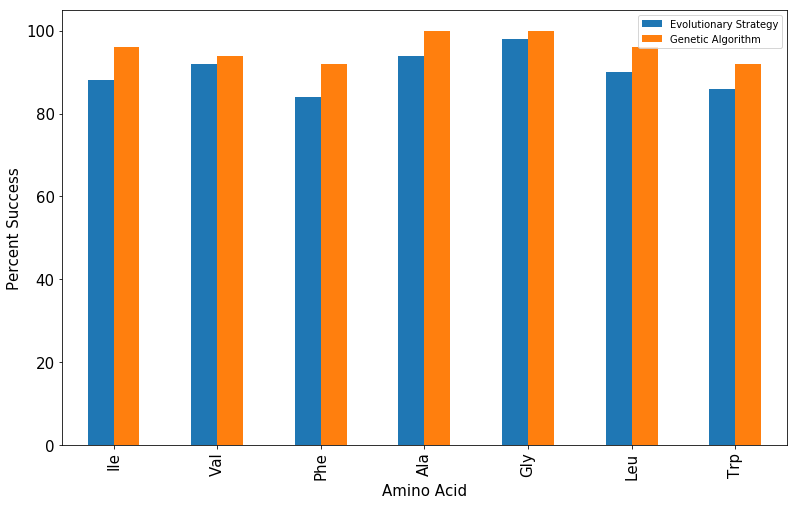

In [33]:


fig = plt.figure(figsize=(13, 8))

ax = fig.add_subplot(111)

stats = pd.concat([b,a], axis=1)

stats.plot.bar(ax=ax)
ax.tick_params(labelsize=15)


ax.set_xlabel("Amino Acid", fontdict={"size":15})
ax.set_ylabel("Percent Success", fontdict={"size":15})
fig.savefig("success_rate.pdf")



In [34]:
mass = []
for name in smiles_dict.iterkeys():
    print name
    #print potential_results[potential_results.AA == name].delta_e.mean()
    print "{0} % of the geometries we calculated had a lower energy than the master data for {1}.".format(potential_results[(potential_results.AA == name) & (potential_results.delta_e < 0)].delta_e.count() * 100. / float(potential_results[(potential_results.AA == name)].delta_e.count()), name)
    print "We were able to successfully calculate {} results out of the 50 attempts.".format(potential_results[(potential_results.AA == name) & (potential_results.type == "ga")].delta_e.dropna().shape[0])
    mass.append([potential_results[potential_results.AA == name].MM.iloc[0], potential_results[potential_results.AA == name].delta_e.dropna().shape[0] / 100., potential_results[potential_results.AA == name].delta_e.mean(), potential_results[potential_results.AA == name].delta_e.std(), potential_results])
    #potential_results[(potential_results.AA == name) & (potential_results.type == "ga")].hist(bins = 10)
    
mass = pd.DataFrame(mass)
mass.columns = ["MM", "success", "mean", "std" , "type"]

Ile
0.0 % of the geometries we calculated had a lower energy than the master data for Ile.
We were able to successfully calculate 48 results out of the 50 attempts.
Val
0.0 % of the geometries we calculated had a lower energy than the master data for Val.
We were able to successfully calculate 47 results out of the 50 attempts.
Phe
0.0 % of the geometries we calculated had a lower energy than the master data for Phe.
We were able to successfully calculate 46 results out of the 50 attempts.
Ala
0.0 % of the geometries we calculated had a lower energy than the master data for Ala.
We were able to successfully calculate 50 results out of the 50 attempts.
Gly
0.0 % of the geometries we calculated had a lower energy than the master data for Gly.
We were able to successfully calculate 50 results out of the 50 attempts.
Leu
0.0 % of the geometries we calculated had a lower energy than the master data for Leu.
We were able to successfully calculate 48 results out of the 50 attempts.
Trp
0.0 % 

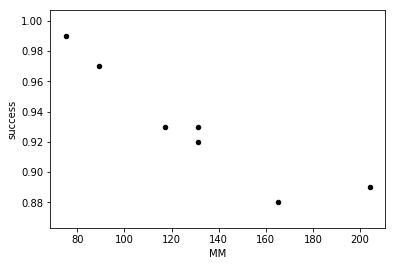

In [35]:
mass.sort_values("MM").plot.scatter( x="MM", y="success", marker="o",c="k")# ax=ax, secondary_y=True)
#mass.sort_values("MM").plot.box()#( x="MM", y="mean")#, yerr="std", marker="o",c="r")# ax=ax )

In [12]:
results = [os.path.join("/gss_gpfs_scratch/harms.n/drug_conformer/",r) for r in os.listdir("/gss_gpfs_scratch/harms.n/drug_conformer/") if ((r.startswith("aa") or r.startswith("gly") or r.startswith("ga"))) and r.endswith(".log") and (not "master" in r)]
results

['/gss_gpfs_scratch/harms.n/drug_conformer/gly_conformer.63.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.328.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.292.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.71.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/gly_conformer.346.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.long_run.155.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_conformer.162.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.152.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/gly_conformer.303.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_conformer.234.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/aa_conformer.332.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/ga_conformer.306.combined.log',
 '/gss_gpfs_scratch/harms.n/drug_conformer/gly_conformer.183.combined.log',
 '/gss_gpfs_sc

In [37]:
lines

[' File lengths (MBytes):  RWF=   1120 Int=      0 D2E=      0 Chk=     32 Scr=     32\n',
 ' Normal termination of Gaussian 09 at Mon Apr  9 09:26:03 2018.\n']

In [39]:
seg_faults = []

for r in results:
    if r.split('/')[-1].split("_")[0].startswith("es"):
        t = "es"
    else:
        t = "ga"
        
        
    #name = r.split('/')[-1].split("_")[0]
        
    
    f = open(r, "r")
    li = f.readlines()[9]
    name = li.split(" ")[-1].split(".")[0]
    
    
    f = open(r, "r")
    lines = f.readlines()[-5:]
    
    #print lines
    for l in lines:
        if "RuntimeError" in l:
            seg_fault = True
            complete = True
        elif "Normal termination of Gaussian" in l:
            seg_fault = False
            complete = True
        else:
            seg_fault = False
            complete = False
            
    seg_faults.append( [name, t, complete, seg_fault])
seg_faults = pd.DataFrame(seg_faults)
seg_faults.columns = ["name", "type", "complete", "seg_fault"]
seg_faults

,name,type,complete,seg_fault
0,Inc,es,True,False
1,Inc,ga,True,False
2,Inc,ga,True,False
3,Inc,es,True,False
4,Inc,ga,True,False
5,Inc,ga,True,False
6,Inc,es,True,False
7,Inc,ga,True,False
8,Inc,ga,True,False
9,Inc,es,True,False


In [40]:
print "For G.A."
print "{} runs successfully completed.".format(seg_faults[(seg_faults.type == "ga") & (seg_faults.seg_fault == False) & (seg_faults.complete == True) ].count().type)

print "{} runs completed, but resulted in a segfault.".format(seg_faults[(seg_faults.type == "ga") & (seg_faults.seg_fault == True)].count().type)

print "{} runs were unable to complete. These need to be rerun with a longer time cutoff.".format(seg_faults[(seg_faults.type == "ga") & (seg_faults.complete == False)].count().type)

print 

print "For E.S."

print "{} runs successfully completed.".format(seg_faults[(seg_faults.type == "es") & (seg_faults.seg_fault == False) & (seg_faults.complete == True) ].count().type)

print "{} runs completed, but resulted in a segfault.".format(seg_faults[(seg_faults.type == "es") & (seg_faults.seg_fault == True)].count().type)

print "{} runs were unable to complete. These need to be rerun with a longer time cutoff.".format(seg_faults[(seg_faults.type == "es") & (seg_faults.complete == False)].count().type)



For G.A.
335 runs successfully completed.
0 runs completed, but resulted in a segfault.
15 runs were unable to complete. These need to be rerun with a longer time cutoff.

For E.S.
316 runs successfully completed.
0 runs completed, but resulted in a segfault.
35 runs were unable to complete. These need to be rerun with a longer time cutoff.


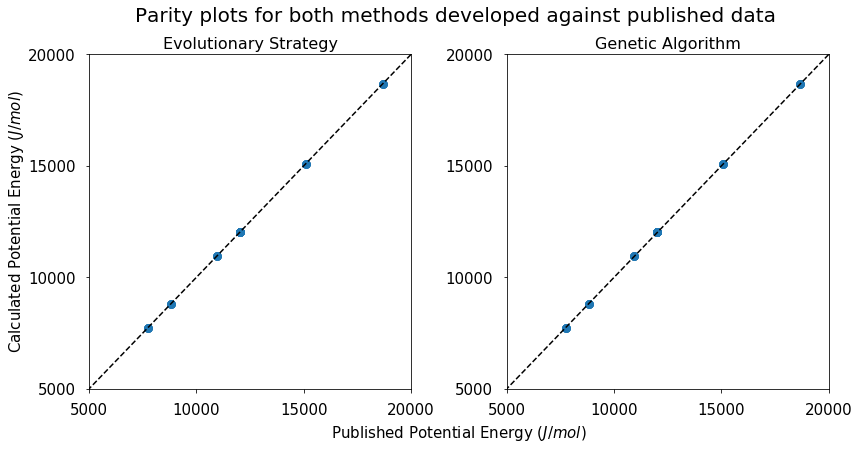

In [46]:

fig = plt.figure(figsize=(13, 7))

ax = fig.add_subplot(111)    # The big subplot
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')

ax1.scatter(-1.*potential_results[(potential_results.T != 0.).any() & (potential_results.type == "es")].e_m, 
            -1.*potential_results[(potential_results.T != 0.).any() & (potential_results.type == "es")].e_r, 
            alpha=0.5, 
            s=50,
            
           )
ax2.scatter(-1.*potential_results[(potential_results.T != 0.).any() & (potential_results.type == "ga")].e_m, 
            -1.*potential_results[(potential_results.T != 0.).any() & (potential_results.type == "ga")].e_r, 
            alpha=0.5, 
            s=50,
            
           )
"""
ax1.set_xscale("log")
ax2.set_xscale("log")
ax1.set_yscale("log")
ax2.set_yscale("log")
"""
ax1.tick_params(labelsize=15, pad=10)
ax2.tick_params(labelsize=15, pad=10)

ax.set_xlabel("Published Potential Energy ($J/mol$)",labelpad=18, fontdict={"size":15})
ax.set_ylabel("Calculated Potential Energy ($J/mol$)", labelpad=40, fontdict={"size":15})
ax.set_title("Parity plots for both methods developed against published data \n", linespacing=1.5, fontdict={"size":20})
#plt.loglog(True)
ax1.plot([20000, 5000],[20000, 5000], "k--" )
ax1.set_title("Evolutionary Strategy", fontdict={"size":16})

ax1.set_xlim([5000, 20000])
ax1.set_ylim([5000, 20000])
ax1.set_xticks([5000, 10000,15000, 20000])
ax1.set_yticks([5000, 10000,15000, 20000])

ax2.plot([20000, 5000],[20000, 5000], "k--" )
ax2.set_title("Genetic Algorithm", fontdict={"size":16})

ax2.set_xlim([5000, 20000])
ax2.set_ylim([5000, 20000])
ax2.set_xticks([5000, 10000,15000, 20000])
ax2.set_yticks([5000, 10000,15000, 20000])
fig.tight_layout()
fig.savefig("parity_plot.pdf")
#slope, intercept, r_value, p_value, std_err = linregress(potential_results[(potential_results.T != 0.).any()].e_m, potential_results[(potential_results.T != 0).any()].e_r)

Trp, Phe, Leu, Ile, Val, Ala, Gly

In [42]:
potential_results.sort_values("delta_e", ascending=False)

,AA,num,e_r,e_m,MM,type,delta_e
272,Ile,68,-12016.521216,-12017.963988,131.175,es,0.000120
221,Ile,91,-12017.066053,-12017.963988,131.175,es,0.000075
635,Leu,86,-12017.132555,-12017.962973,131.175,es,0.000069
397,Gly,82,-7739.097198,-7739.550159,75.067,es,0.000059
303,Gly,79,-7739.097204,-7739.550159,75.067,es,0.000059
368,Gly,50,-7739.097231,-7739.550159,75.067,es,0.000059
306,Gly,72,-7739.097310,-7739.550159,75.067,es,0.000059
318,Gly,85,-7739.097351,-7739.550159,75.067,es,0.000059
354,Gly,99,-7739.097364,-7739.550159,75.067,es,0.000059
382,Gly,81,-7739.097443,-7739.550159,75.067,es,0.000058
